### Lab Title: Customer Data Cleaning for Credit Card Fraud Detection 


#### Problem Statement:

The primary goal of this project is to preprocess and clean a dataset containing customer transaction data, which will be used for developing a credit card fraud detection system. The dataset presents several data quality issues that must be resolved to improve the reliability of machine learning models. These issues include:

Missing Data: Certain records in the dataset are incomplete, with key values missing, potentially affecting the accuracy and integrity of the analysis.
Duplicate Entries: The dataset contains repeated transaction records that need to be identified and removed to prevent them from impacting the results.
Outlier Values: Some transaction amounts or other features are extreme and deviate significantly from typical values, which could distort the performance of the model.

#### Objective:

- Handle Missing Values: Address and manage missing data to ensure a complete dataset.
- Remove Duplicates: Identify and eliminate duplicate records to avoid data redundancy.
- Address Outliers: Detect and handle extreme values that could affect model performance.
- Prepare Data for Modeling: Process and format the data for use in machine learning models.
- Build Fraud Detection Model: Ensure the data is ready to train a model that can accurately identify fraudulent transactions.


#### Requirements:
- Python installed (version 3.x recommended).
- Pandas and NumPy libraries installed (`pip install pandas numpy`).
- Jupyter Notebook (optional but recommended for running the lab).

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Loading the Dataset

In [2]:
df = pd.read_csv('Customer_Transactions.csv')
df

,tranDate,custName,cardNum,zipCode,tranAmount
0,2023-09-15 20:32:41,Catherine Bell,2294637276392057,8642,848
1,2023-05-16 23:18:37,Parker Riddle,342160763812707,80349,574
2,2023-09-11 18:38:23,Brenda Baird,4137641055044779,34346,600
3,2023-08-04 21:42:37,Kimberly Carter,3546070762859922,47715,583
4,2023-09-22 08:27:40,Daniel Rodriguez,213170012973743,77790,3636
...,...,...,...,...,...
5495,2024-01-18 01:08:01,Luke Garner,180059140353879,71470,4200
5496,2023-12-07 02:26:00,Darrell Vargas,3578703731370362,86141,3063
5497,2023-08-30 23:21:48,Ricky Smith,376357770060994,31935,2394
5498,2023-12-18 02:35:29,Raymond Garcia,30071114876795,69219,2193


In [3]:
# **Part 1: Handling and Summarizing Missing Values **
# Handling missing data 
print(df.isnull().sum())
print("------------------------------------------------ ")
# Check the number of missing values in each column
print(df.isnull().sum())
print("------------------------------------------------- ")
# For percentage of missing values
print(df.isnull().mean() * 100)


tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64
------------------------------------------------ 
tranDate      0
custName      0
cardNum       0
zipCode       0
tranAmount    0
dtype: int64
------------------------------------------------- 
tranDate      0.0
custName      0.0
cardNum       0.0
zipCode       0.0
tranAmount    0.0
dtype: float64


In [4]:
# **Part 2: Dropping Missing Values **
# Dropping Rows with Missing Data
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop rows with missing values only in a specific column
df_cleaned = df.dropna(subset=['cardNum'])

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

# Drop columns where more than a certain percentage of values are missing
threshold = len(df) * 0.3  # If more than 30% data is missing
df_cleaned = df.dropna(thresh=threshold, axis=1)
print(df_cleaned)
print(" -----------------------------------------------------------------------------------------------------------------------------------------------")
print(threshold)

                 tranDate          custName              cardNum  zipCode  \
0     2023-09-15 20:32:41    Catherine Bell     2294637276392057     8642   
1     2023-05-16 23:18:37     Parker Riddle      342160763812707    80349   
2     2023-09-11 18:38:23      Brenda Baird     4137641055044779    34346   
3     2023-08-04 21:42:37   Kimberly Carter     3546070762859922    47715   
4     2023-09-22 08:27:40  Daniel Rodriguez      213170012973743    77790   
...                   ...               ...                  ...      ...   
5495  2024-01-18 01:08:01       Luke Garner      180059140353879    71470   
5496  2023-12-07 02:26:00    Darrell Vargas     3578703731370362    86141   
5497  2023-08-30 23:21:48       Ricky Smith      376357770060994    31935   
5498  2023-12-18 02:35:29    Raymond Garcia       30071114876795    69219   
5499  2023-12-24 21:47:48      Brett Tucker  4970134866497942923    27947   

      tranAmount  
0            848  
1            574  
2            600  

In [5]:
# **Part 3: Filling Missing Values (Imputation) **


# Fill all missing values with a constant value, such as 0 or "Unknown"
df_filled = df.fillna(0)  # For numeric columns
df_filled = df.fillna("Unknown")  # For categorical columns
df_filled

,tranDate,custName,cardNum,zipCode,tranAmount
0,2023-09-15 20:32:41,Catherine Bell,2294637276392057,8642,848
1,2023-05-16 23:18:37,Parker Riddle,342160763812707,80349,574
2,2023-09-11 18:38:23,Brenda Baird,4137641055044779,34346,600
3,2023-08-04 21:42:37,Kimberly Carter,3546070762859922,47715,583
4,2023-09-22 08:27:40,Daniel Rodriguez,213170012973743,77790,3636
...,...,...,...,...,...
5495,2024-01-18 01:08:01,Luke Garner,180059140353879,71470,4200
5496,2023-12-07 02:26:00,Darrell Vargas,3578703731370362,86141,3063
5497,2023-08-30 23:21:48,Ricky Smith,376357770060994,31935,2394
5498,2023-12-18 02:35:29,Raymond Garcia,30071114876795,69219,2193


In [6]:

df = df.drop_duplicates()

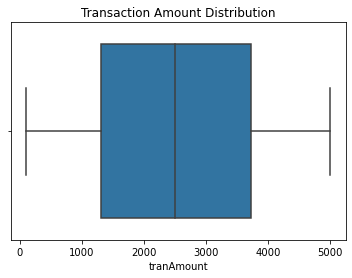

In [7]:
# **Part 4: Handling  and Visualizing Outliers **
# A box plot is a good way to identify potential outliers in the Amount column.


sns.boxplot(x=df['tranAmount'])
plt.title('Transaction Amount Distribution')
plt.show()


<h2>Removing Outliers:</h2>

We can remove values that are outside a defined range (e.g., values that are 1.5 times the interquartile range above the 75th percentile or below the 25th percentile).

In [8]:
# **Part 5: Removing Outliers **
# We can remove values that are outside a defined range (e.g., values that are 1.5 times the interquartile range above the 75th percentile or below the 25th percentile).


Q1 = df['tranAmount'].quantile(0.25)
Q3 = df['tranAmount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['tranAmount'] >= (Q1 - 1.5 * IQR)) & (df['tranAmount'] <= (Q3 + 1.5 * IQR))]
print(IQR)
print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(df)

2426.75
-------------------------------------------------------------------------------------------------------------------------------------------
                 tranDate          custName              cardNum  zipCode  \
0     2023-09-15 20:32:41    Catherine Bell     2294637276392057     8642   
1     2023-05-16 23:18:37     Parker Riddle      342160763812707    80349   
2     2023-09-11 18:38:23      Brenda Baird     4137641055044779    34346   
3     2023-08-04 21:42:37   Kimberly Carter     3546070762859922    47715   
4     2023-09-22 08:27:40  Daniel Rodriguez      213170012973743    77790   
...                   ...               ...                  ...      ...   
5495  2024-01-18 01:08:01       Luke Garner      180059140353879    71470   
5496  2023-12-07 02:26:00    Darrell Vargas     3578703731370362    86141   
5497  2023-08-30 23:21:48       Ricky Smith      376357770060994    31935   
5498  2023-12-18 02:35:29    Raymond Garcia       30071114876795    69219   
5499 

In [11]:
# **Part 6: Normalization and Standardization **

scaler = StandardScaler()
df['tranAmount'] = scaler.fit_transform(df[['tranAmount']])

In [12]:
# **Part 7: Final Inspection and Ready for Modeling **

# Check for missing data again
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()


0